##Importação de bibliotecas

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

##Carregamento da imagem

In [84]:
imagem = cv2.imread(r'Galaxy.jpg', cv2.IMREAD_GRAYSCALE) #carregando a imagem com OpenCV, já convertendo para tons de cinza
imagem.shape


(299, 283)

##Soma de imagens ruidosas e média dos valores dos ruídos

In [91]:

valores_k = [1, 5, 10, 20, 50, 100] #array de valores do número de imagens somadas na média -> k
plots_k = [] #array para adicionar as imagens de cada valor de k
#nas linhas abaixo, será feito uma iteração percorrendo os valores de k, em que a cada iteração será realizado um loop somando as imagens ruidosas.
for k in valores_k: #iteração em k
    soma_ruidos = np.zeros(imagem.shape) #criação de um array de zeros com as dimensões da imagem
    for i in range(k): #loop de soma de imagens ruidosas
        soma_ruidos += (imagem + np.random.normal(0, 64, imagem.shape)) #soma cumulativa das imagens com ruído gaussiano

    soma_ruidos = soma_ruidos / k #realizando a média 
    plots_k.append((k,soma_ruidos)) #adicionando a imagem da determinada iteração na lista de plots como uma tupla (k, imagem), o k é salvo apenas para fins de legenda da plotagem



##Plotagem

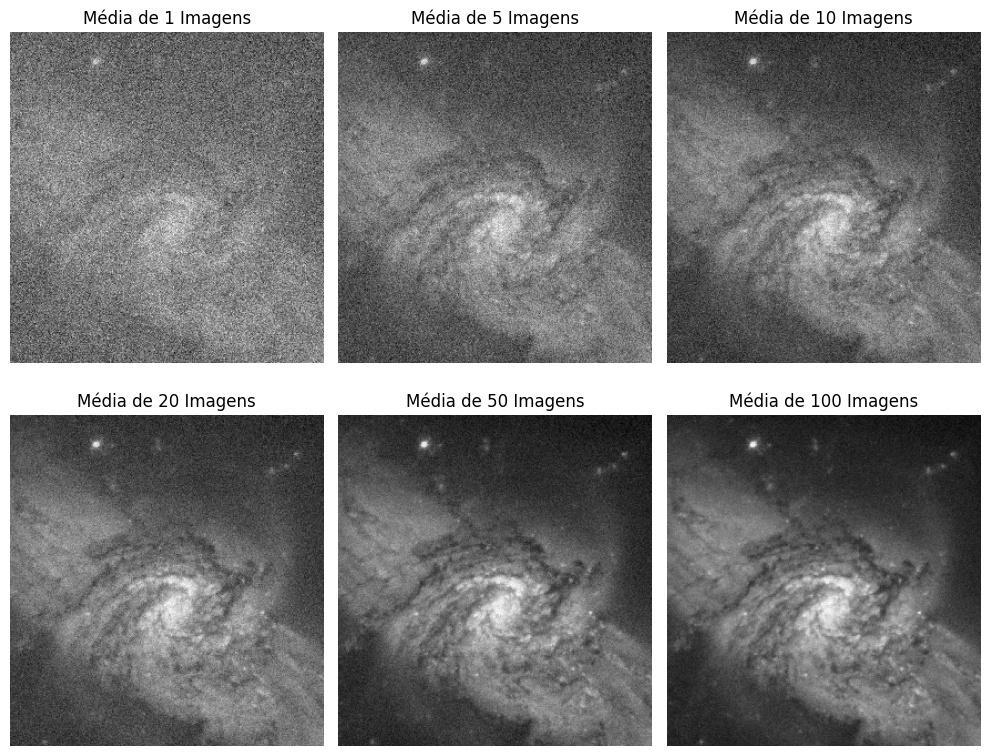

In [92]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8)) #definição de uma figura de subplots com 2 linhas e 3 colunas
axes = axes.flatten() #método que transforma matriz em vetor, facilitando acesso de índices

# Iterar sobre a lista de tuplas e plotar
for i, (k, img) in enumerate(plots_k):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Média de {k} Imagens')
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()
